In [1]:
#import
import numpy as np
import pandas as pd
import seaborn
import codecs
import jieba
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import classification_report,f1_score

In [2]:
data = pd.read_csv('/Users/mac/Desktop/2022春课件/时序/商品清单（new）.csv')
data.head()

,商品名称,一级分类,二级分类,三级分类
0,**N蓝妹啤酒易拉罐3,酒类,啤酒,啤酒
1,农夫水溶C100青皮桔445ml,饮料,果蔬汁,果蔬饮料
2,N七匹狼（软灰）,烟类,香烟,软盒香烟
3,N七匹狼（软红）,烟类,香烟,软盒香烟
4,农夫山泉水550ml,饮料,水,矿泉水


In [3]:
#标签映射为整数
listType = data['一级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['一级分类_整数'] = data['一级分类'].map(com_map)

listType = data['二级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['二级分类_整数'] = data['二级分类'].map(com_map)

listType = data['三级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['三级分类_整数'] = data['三级分类'].map(com_map)

data.head()

,商品名称,一级分类,二级分类,三级分类,一级分类_整数,二级分类_整数,三级分类_整数
0,**N蓝妹啤酒易拉罐3,酒类,啤酒,啤酒,0,0,0
1,农夫水溶C100青皮桔445ml,饮料,果蔬汁,果蔬饮料,1,1,1
2,N七匹狼（软灰）,烟类,香烟,软盒香烟,2,2,2
3,N七匹狼（软红）,烟类,香烟,软盒香烟,2,2,2
4,农夫山泉水550ml,饮料,水,矿泉水,1,3,3


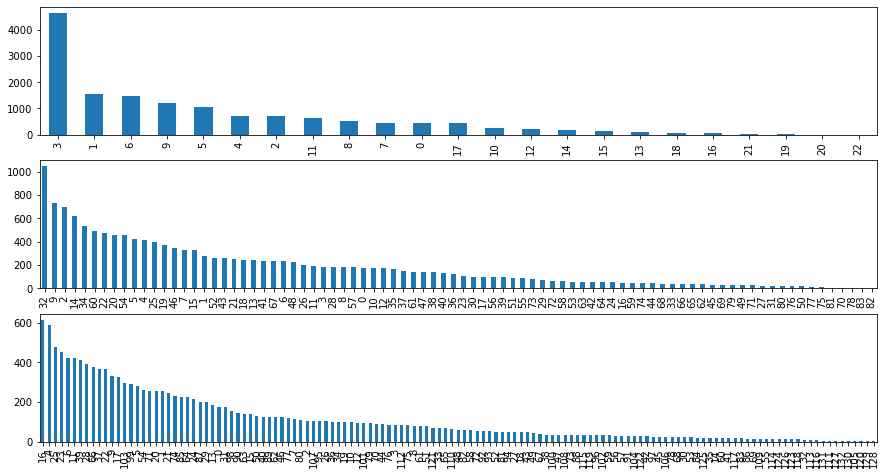

In [4]:
#观察样本比例
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(15,8))
data['一级分类_整数'].value_counts().plot.bar(ax=axes[0])
data['二级分类_整数'].value_counts().plot.bar(ax=axes[1])
data['三级分类_整数'].value_counts().plot.bar(ax=axes[2])
plt.show()

## 存在比较严重的比例失衡问题

## 目前想到可以采用不同做法的地方：
#### 1、样本失衡的处理方法
#### 2、不同的词向量化方法
#### 3、训练集与测试集的划分（如果解决了样本失衡可不考虑）
#### 4、三级分类用三个模型还是一个模型
#### 5、不同的模型


## 可能存在的问题：
#### 1、模型是否存在依赖品牌名称的现象，如果是，是好还是坏

In [5]:
first_f1_score_h = []
first_acc_h = []

second_f1_score_h = []
second_acc_h = []

third_f1_score_h = []
third_acc_h = []

## 模型1：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/高斯朴素贝叶斯分别对三类标签拟合

In [6]:
#词袋向量
stopkey = [w.strip() for w in codecs.open('/Users/mac/未命名文件夹/呆萌的停用词表.txt', 'r').readlines()]
names = ""
for name in data['商品名称']:
    names += (name + "\n")
corpus = {}
for i, com in enumerate(names.split('\n')):
    dict1 = {}
    for tok in jieba.lcut(com):
        if tok not in stopkey:
            dict1[tok] = 1
    corpus[i] = dict1
df = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df = df.loc[:df.shape[0]-2]
df.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_t/zp2z4_4x4gg78j4gh86h6z5m0000gn/T/jieba.cache
Loading model cost 0.881 seconds.
Prefix dict has been built successfully.


,N,蓝妹,啤酒,易拉罐,农夫,水溶,C100,青皮,桔,445ml,...,绿野,恬静,鲻,卧云东,紫衫,擅梅菜,紫仙,派香,派原,祖名素
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#一级标签效果
X = df
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB1=GaussianNB()
modelNB1.fit(X_train,Y_train)
Y_pre = modelNB1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#二级标签效果
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#三级标签效果
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

## 模型2：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/随机森林分别对三类标签拟合

In [ ]:
from sklearn import ensemble
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF1 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF1.fit(X_train,Y_train)
    Y_pre = modelRF1.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [11]:
first_acc_h.append(max(testAcc))
first_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

In [ ]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF2 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF2.fit(X_train,Y_train)
    Y_pre = modelRF2.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [13]:
second_acc_h.append(max(testAcc))
second_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

In [ ]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF3 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF3.fit(X_train,Y_train)
    Y_pre = modelRF3.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [15]:
third_acc_h.append(max(testAcc))
third_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

## 模型3：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/支持向量机分别对三类标签拟合

In [ ]:
from sklearn import svm
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC1 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC1.fit(X_train,Y_train)
Y_pre = modelSVC1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC2 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC2.fit(X_train,Y_train)
Y_pre = modelSVC2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC3 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC3.fit(X_train,Y_train)
Y_pre = modelSVC3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

## 模型4：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/高斯朴素贝叶斯分别对三类标签拟合

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
TextSet = []
for name in data['商品名称']:
    TextSet.append(name)
WordSet = [" ".join(jieba.cut(item)) for item in TextSet]

def cleanText(alltext):
    textNew=[]
    for sig_list in alltext:
        tmp = [''.join(words) for words in sig_list.split(' ') if (words not in stopkey)]
        textNew.append(' '.join(tmp))
    return(textNew)

WordSetN=cleanText(WordSet)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(WordSetN)
words = vectorizer.get_feature_names()
df2 = pd.DataFrame(X.toarray(),columns=words)
X = df2

In [ ]:
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB1=GaussianNB()
modelNB1.fit(X_train,Y_train)
Y_pre = modelNB1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

## 模型5：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/随机森林分别对三类标签拟合

In [ ]:
from sklearn import ensemble
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF1 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF1.fit(X_train,Y_train)
    Y_pre = modelRF1.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
first_acc_h.append(max(testAcc))
first_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

In [ ]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF2 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF2.fit(X_train,Y_train)
    Y_pre = modelRF2.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
second_acc_h.append(max(testAcc))
second_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

In [ ]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF3 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF3.fit(X_train,Y_train)
    Y_pre = modelRF3.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
third_acc_h.append(max(testAcc))
third_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

## 模型6：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/支持向量机分别对三类标签拟合

In [ ]:
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC1 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC1.fit(X_train,Y_train)
Y_pre = modelSVC1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

In [ ]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

#### Acc/F1柱状图

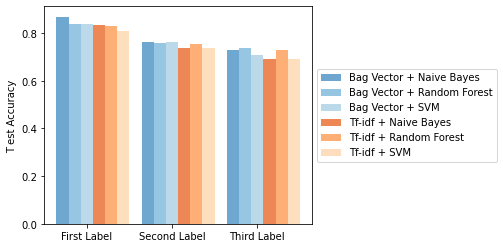

In [5]:
color = plt.cm.tab20c(np.linspace(0, 0.36, 6))

Acc = [first_acc_h, second_acc_h, third_acc_h]
ysr=['First Label', 'Second Label', 'Third Label']
x1 = [1,8,15]
x2 = [i + 1 for i in x1]
x3 = [i + 2 for i in x1]
x4 = [i + 3 for i in x1]
x5 = [i + 4 for i in x1]
x6 = [i + 5 for i in x1]
y1 = [i[0] for i in Acc]
y2 = [i[1] for i in Acc]
y3 = [i[2] for i in Acc]
y4 = [i[3] for i in Acc]
y5 = [i[4] for i in Acc]
y6 = [i[5] for i in Acc]
ax1 = plt.subplot(1,1,1)
plt.sca(ax1)
plt.xlabel("") #X轴标签
plt.ylabel("T est Accuracy")  #Y轴标签
plt.bar(x1, y1, alpha=0.7, width=1, label="Bag Vector + Naive Bayes", color = color[0])
plt.bar(x2, y2, alpha=0.7, width=1, label="Bag Vector + Random Forest", color = color[1])
plt.bar(x3, y3, alpha=0.7, width=1, label="Bag Vector + SVM", color = color[2])
plt.bar(x4, y4, alpha=0.7, width=1, label="Tf-idf + Naive Bayes", color = color[3])
plt.bar(x5, y5, alpha=0.7, width=1, label="Tf-idf + Random Forest", color = color[4])
plt.bar(x6, y6, alpha=0.7, width=1, label="Tf-idf + SVM", color = color[5])
ax1.set_xticks(x3)
ax1.set_xticklabels(ysr)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width* 0.8 , box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)

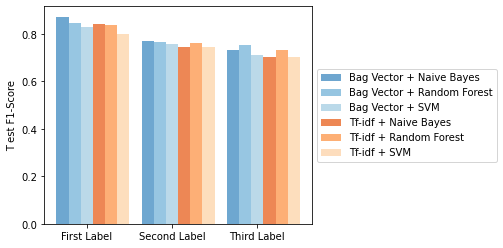

In [109]:
F1 = [first_f1_score_h, second_f1_score_h, third_f1_score_h]
ysr=['First Label', 'Second Label', 'Third Label']
x1 = [1,8,15]
x2 = [i + 1 for i in x1]
x3 = [i + 2 for i in x1]
x4 = [i + 3 for i in x1]
x5 = [i + 4 for i in x1]
x6 = [i + 5 for i in x1]
y1 = [i[0] for i in F1]
y2 = [i[1] for i in F1]
y3 = [i[2] for i in F1]
y4 = [i[3] for i in F1]
y5 = [i[4] for i in F1]
y6 = [i[5] for i in F1]
y0 = ["","",""]
ax1 = plt.subplot(1,1,1)
plt.sca(ax1)
plt.xlabel("") #X轴标签
plt.ylabel("T est F1-Score")  #Y轴标签
plt.bar(x1, y1, alpha=0.7, width=1, label="Bag Vector + Naive Bayes", color = color[0])
plt.bar(x2, y2, alpha=0.7, width=1, label="Bag Vector + Random Forest", color = color[1])
plt.bar(x3, y3, alpha=0.7, width=1, label="Bag Vector + SVM", color = color[2])
plt.bar(x4, y4, alpha=0.7, width=1, label="Tf-idf + Naive Bayes", color = color[3])
plt.bar(x5, y5, alpha=0.7, width=1, label="Tf-idf + Random Forest", color = color[4])
plt.bar(x6, y6, alpha=0.7, width=1, label="Tf-idf + SVM", color = color[5])
ax1.set_xticks(x3)
ax1.set_xticklabels(ysr)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width* 0.8 , box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)

In [112]:
Acc

[[0.8684327693677649,
  0.8397150489759573,
  0.8379341050756901,
  0.8343722172751559,
  0.8299198575244879,
  0.8065449688334817],
 [0.7640249332146037,
  0.7595725734639359,
  0.7611308993766697,
  0.7377560106856634,
  0.7524487978628673,
  0.7377560106856634],
 [0.7272929652715939,
  0.7361976847729297,
  0.7099287622439893,
  0.6930097951914514,
  0.7281834372217275,
  0.6930097951914514]]

In [111]:
F1

[[0.8721646270645552,
  0.8454380830684984,
  0.8308035556798741,
  0.8427847087818908,
  0.8361367786545584,
  0.800560150956417],
 [0.769528754611683,
  0.7672068184702937,
  0.756352812452187,
  0.7456473586120339,
  0.759825550646379,
  0.7456473586120339],
 [0.733008775633781,
  0.7513925872900818,
  0.7102989560671727,
  0.7029327262848254,
  0.7337654353340679,
  0.7029327262848254]]